In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sn

In [2]:
#Extracting Data
original_data = pd.read_excel("Absenteeism_at_work_Project.xls")

In [3]:
original_data = original_data.reset_index(drop=True)
original_data.index += 1

In [4]:
df=original_data

In [5]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
3,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
4,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
5,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
6,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
8,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
9,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
10,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [6]:
#Converting variables to categoric and numeric
a= list(range(1, 5, 1))
b= list(range(11, 17, 1))
c=list(set().union(a,b))
for i in c:
    df.iloc[:, i] = df.iloc[:, i].astype('category')


df.iloc[:, 0] = df.iloc[:, 0].astype(object)
df.iloc[:, 13] = df.iloc[:, 13].astype('float64')
df.iloc[:, 16] = df.iloc[:, 16].astype('float64')


## Checking missing values 

In [7]:
#Missing value analysis
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [8]:
df1 = df[df.isnull().any(axis=1)]
df1

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
6,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
15,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,NaN,4.0
16,24,14.0,7.0,6,1,246.0,25.0,16.0,41.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,NaN
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
21,18,10.0,8.0,4,1,330.0,16.0,4.0,28.0,205917.0,...,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,NaN
25,11,18.0,8.0,2,1,289.0,36.0,13.0,33.0,205917.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,NaN,8.0
28,30,28.0,8.0,4,1,157.0,27.0,6.0,29.0,205917.0,...,0.0,1.0,0.0,1.0,1.0,0.0,75.0,185.0,NaN,4.0
32,2,18.0,8.0,5,1,235.0,29.0,12.0,48.0,205917.0,...,0.0,1.0,1.0,0.0,1.0,5.0,88.0,163.0,NaN,8.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0


In [9]:
#Creating a new Dataframe by data types
df_num=df.select_dtypes(['float64'])
df_cat=df.select_dtypes(['category'])
df_num = df_num.reset_index(drop=True)
df_num.index += 1
df_cat = df_cat.reset_index(drop=True)
df_cat.index += 1

## Feature Selection before imputaion

In [10]:
#Feature Selection using Correlation, VIF, and Chi-Square test

## 1) Correlation

correlations = df_num.corr()
correlations
correlations.style.background_gradient()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1,0.257917,-0.349927,-0.22779,0.00133231,-0.0808867,0.382391,0.399665,-0.209945,-0.195982,-0.135928,0.0472163
Distance from Residence to Work,0.257917,1,0.128497,-0.147095,-0.0786912,-0.0141823,0.0470844,0.205575,-0.0466121,-0.357828,0.117728,-0.102967
Service time,-0.349927,0.128497,1,0.670218,0.0134231,-0.00488155,-0.0505427,-0.441339,0.454772,-0.0578259,0.502634,0.0165598
Age,-0.22779,-0.147095,0.670218,1,-0.0369233,-0.0374263,0.0585017,-0.229964,0.418691,-0.0672474,0.467749,0.0779778
Work load Average/day,0.00133231,-0.0786912,0.0134231,-0.0369233,1,-0.0871998,0.0320352,-0.00093422,-0.0303855,0.109154,-0.0748954,0.0279859
Hit target,-0.0808867,-0.0141823,-0.00488155,-0.0374263,-0.0871998,1,-0.0102965,0.00531286,-0.0448165,0.0887133,-0.0696561,0.0223112
Son,0.382391,0.0470844,-0.0505427,0.0585017,0.0320352,-0.0102965,1,0.112172,-0.142318,-0.0161395,-0.144819,0.120576
Pet,0.399665,0.205575,-0.441339,-0.229964,-0.00093422,0.00531286,0.112172,1,-0.106052,-0.106189,-0.0821825,-0.029018
Weight,-0.209945,-0.0466121,0.454772,0.418691,-0.0303855,-0.0448165,-0.142318,-0.106052,1,0.307546,0.90406,-0.00927527
Height,-0.195982,-0.357828,-0.0578259,-0.0672474,0.109154,0.0887133,-0.0161395,-0.106189,0.307546,1,-0.127717,0.0947721


In [11]:
## 2) Chi-square test

from scipy.stats import chi2_contingency
factors_paired_bin = [(i,j) for i in df_cat.columns.values for j in df_cat.columns.values] 

chi2_bin, p_values_bin =[], []

for f in factors_paired_bin:
    if f[0] != f[1]:
             chitest_bin = chi2_contingency(pd.crosstab(df_cat[f[0]], df_cat[f[1]]))   
             chi2_bin.append(chitest_bin[0])
             p_values_bin.append(chitest_bin[1])
            
    else:      
             chi2_bin.append(0)
             p_values_bin.append(0)

chi2_bin = np.array(chi2_bin).reshape((8,8))
chi2_df_bin = pd.DataFrame(chi2_bin, index=df_cat.columns.values, columns=df_cat.columns.values)
p_values_bin = np.array(p_values_bin).reshape((8,8)) # shaping it as a matrix
p_values_bin = pd.DataFrame(p_values_bin, index=df_cat.columns.values, columns=df_cat.columns.values)
p_values_bin

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
Reason for absence,0.000000e+00,4.925170e-19,0.058063,2.838194e-22,4.324537e-125,8.983660e-11,2.292921e-08,3.541072e-09
Month of absence,4.925170e-19,0.000000e+00,0.554457,0.000000e+00,2.042695e-04,1.326699e-02,9.479499e-03,2.333154e-02
Day of the week,5.806286e-02,5.544573e-01,0.000000,1.953925e-01,2.976322e-01,5.928306e-01,6.325213e-01,8.073502e-01
Seasons,2.838194e-22,0.000000e+00,0.195393,0.000000e+00,7.817284e-05,9.018080e-02,1.291514e-01,7.879567e-02
Disciplinary failure,4.324537e-125,2.042695e-04,0.297632,7.817284e-05,0.000000e+00,3.648447e-01,2.644425e-01,3.706029e-03
Education,8.983660e-11,1.326699e-02,0.592831,9.018080e-02,3.648447e-01,0.000000e+00,2.418696e-35,1.102812e-20
Social drinker,2.292921e-08,9.479499e-03,0.632521,1.291514e-01,2.644425e-01,2.418696e-35,0.000000e+00,5.824784e-03
Social smoker,3.541072e-09,2.333154e-02,0.807350,7.879567e-02,3.706029e-03,1.102812e-20,5.824784e-03,0.000000e+00


In [12]:
cnames_v = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','Body mass index','Absenteeism time in hours']

In [13]:
#VIF before dropping variable any variable
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf             
from statsmodels.tools.tools import add_constant
original_data=original_data.dropna()
numeric_df_v = add_constant(original_data[cnames_v])
vif_v = pd.Series([vf(numeric_df_v.values, i) for i in range(numeric_df_v.shape[1])], 
                 index = numeric_df_v.columns)
vif_v

const                              23420.905934
Distance from Residence to Work        1.681130
Service time                           3.371883
Age                                    2.424660
Work load Average/day                  1.049937
Transportation expense                 1.597151
Hit target                             1.043096
Son                                    1.255561
Pet                                    1.580640
Weight                               157.814366
Height                                28.786233
Body mass index                      147.832865
Absenteeism time in hours              1.048464
dtype: float64

In [14]:
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height','Absenteeism time in hours']

In [15]:
catnames = list(set(df.columns) - set(cnames_v))

In [16]:
#VIF after dropping Body mass index variable
numeric_df = add_constant(original_data[cnames])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif

const                              1844.786325
Distance from Residence to Work       1.600629
Service time                          3.240114
Age                                   2.306970
Work load Average/day                 1.048436
Transportation expense                1.591382
Hit target                            1.042957
Son                                   1.251408
Pet                                   1.509672
Weight                                1.645911
Height                                1.484519
Absenteeism time in hours             1.046549
dtype: float64

In [17]:
#Dropping redundant Features, and NAs from Target variable
df = df.drop(['Body mass index'], axis=1)
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)

In [18]:
#Marking cells as NA containing months of absence and reason of absence equal to zero
df.loc[df['Reason for absence'] == 0,'Reason for absence'] = np.nan
df.loc[df['Month of absence'] == 0,'Month of absence'] = np.nan

In [19]:
df['ID'].value_counts()

3     111
28     75
34     54
22     46
11     40
20     39
15     37
36     32
24     28
14     28
33     24
10     22
1      22
17     20
5      18
18     15
13     14
25     10
6       8
9       8
12      7
27      6
30      6
7       6
2       6
23      6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [20]:
missing_val1 = pd.DataFrame(df.isnull().sum())
missing_val1

,0
ID,0
Reason for absence,39
Month of absence,4
Day of the week,0
Seasons,0
Transportation expense,6
Distance from Residence to Work,3
Service time,3
Age,2
Work load Average/day,8


In [21]:
df2 = df[df.isnull().any(axis=1)]
df2

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
2,36,NaN,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,0.0
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,8.0
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,2.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,92.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,4.0
46,34,23.0,9.0,2,1,118.0,NaN,10.0,37.0,241476.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,3.0
50,15,14.0,9.0,2,4,NaN,31.0,12.0,40.0,241476.0,92.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,32.0
52,29,NaN,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,0.0
55,11,NaN,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,0.0
59,13,NaN,9.0,4,4,369.0,17.0,12.0,31.0,241476.0,92.0,1.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,0.0
66,22,23.0,10.0,5,4,NaN,NaN,9.0,30.0,253465.0,93.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,1.0


## Imputing missing values after feature selection

In [22]:
## Imputing Missing Values using KNN imputation
from fancyimpute import KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns).round(0)

C:\Users\Deepanshu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/718 with 0 missing, elapsed time: 9.617
Imputing row 101/718 with 0 missing, elapsed time: 11.285
Imputing row 201/718 with 0 missing, elapsed time: 11.285
Imputing row 301/718 with 0 missing, elapsed time: 11.285
Imputing row 401/718 with 0 missing, elapsed time: 11.285
Imputing row 501/718 with 1 missing, elapsed time: 11.285
Imputing row 601/718 with 0 missing, elapsed time: 11.301
Imputing row 701/718 with 0 missing, elapsed time: 11.301


## Visualization of data

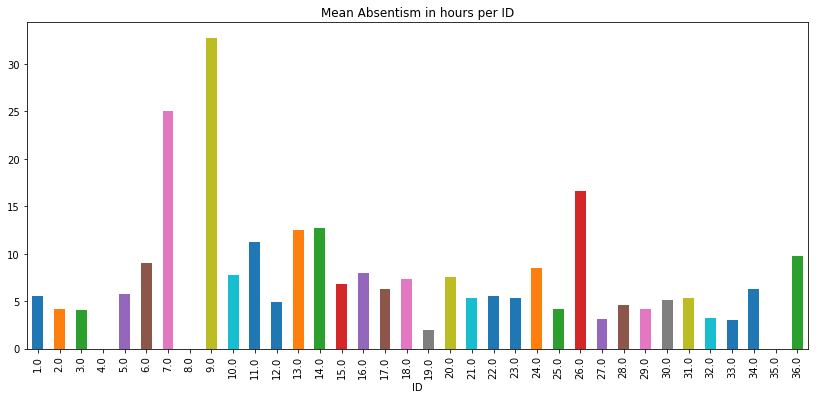

In [23]:
#Visualizations using barplots
import matplotlib.pyplot as plt
df.groupby('ID')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours per ID',figsize=(14,6))
plt.show()

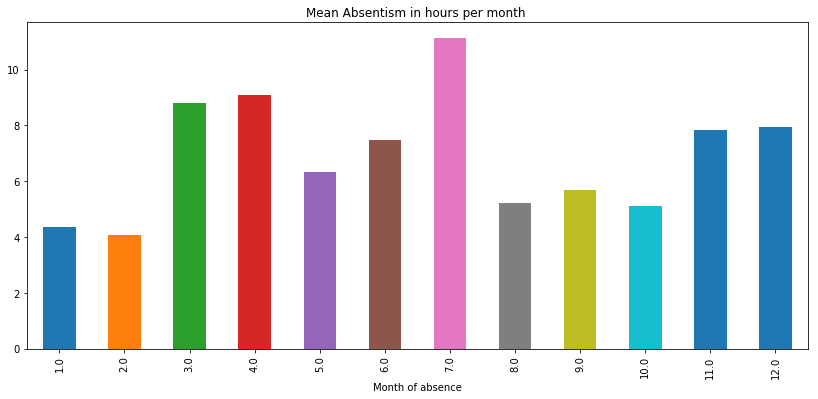

In [24]:
df.groupby('Month of absence')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

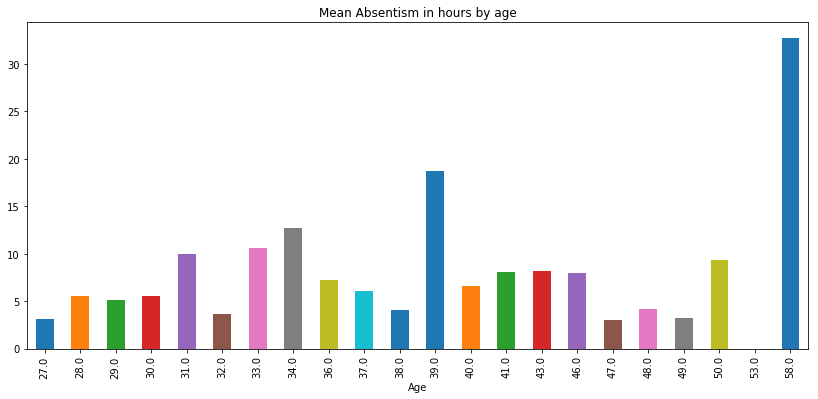

In [25]:
df.groupby('Age')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours by age',figsize=(14,6))
plt.show()

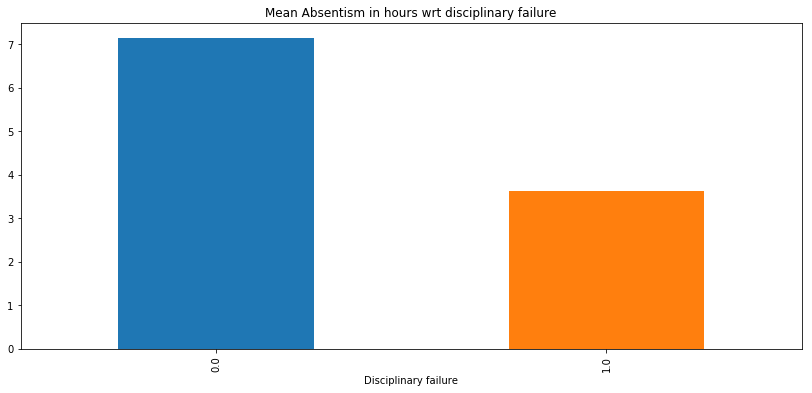

In [26]:
df.groupby('Disciplinary failure')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

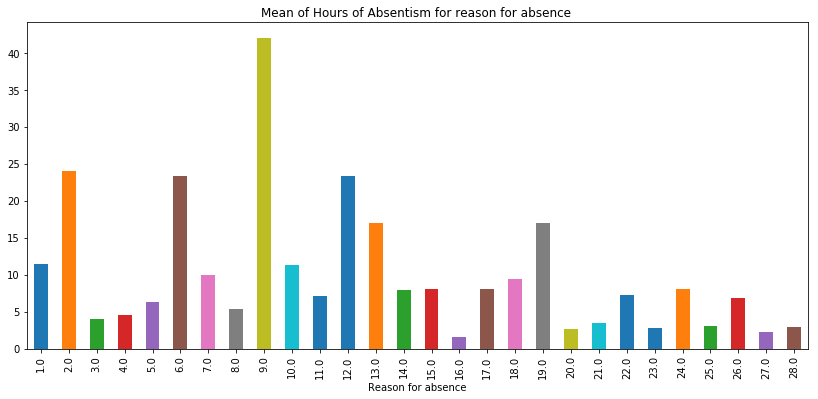

In [27]:
df.groupby('Reason for absence')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

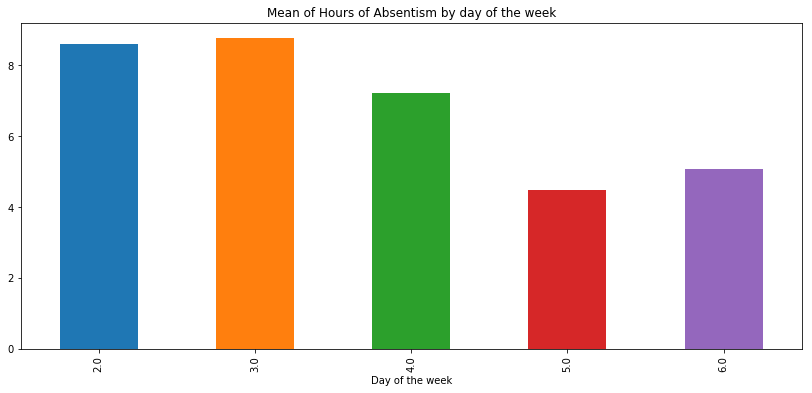

In [28]:
df.groupby('Day of the week')['Absenteeism time in hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

Transportation expense                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Distance from Residence to Work    AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Service time                       AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Age                                   AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Work load Average/day              AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Hit target                         AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Son                                   AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Pet                                AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Weight                             AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
Height                                AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Body mass index                    AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Absenteeism time in hours          AxesSubplot(0.672059,0.510532;

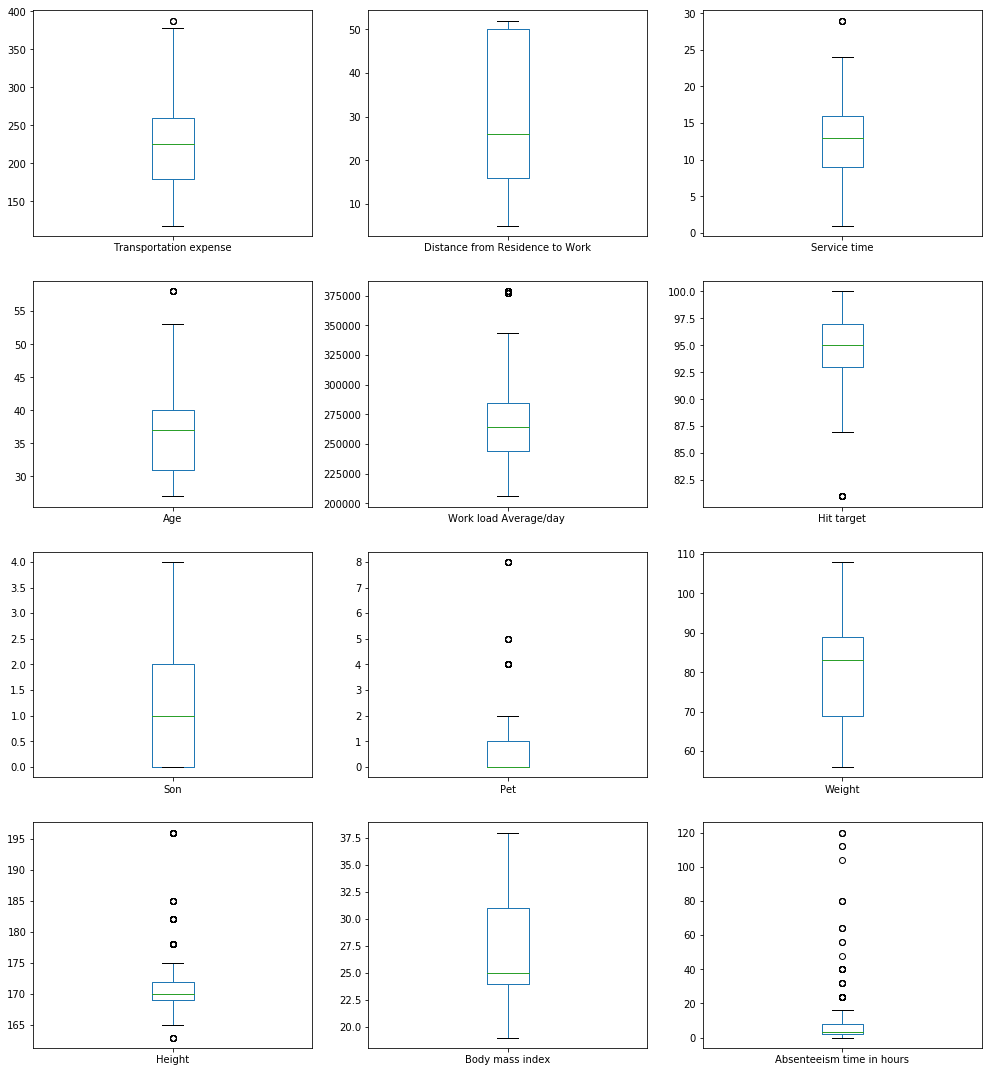

In [29]:
#Boxplots of numeric varaibles before outlier removal
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [30]:
#Checking the variable importance with target variable using Extra Tree Regressor to get a feel of importance of variables
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=70)
X = df.drop(columns=('Absenteeism time in hours'))
y = df['Absenteeism time in hours']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': df.drop(columns='Absenteeism time in hours').columns,
                         'importance':reg.feature_importances_*100})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,Reason for absence,19.867214
1,Day of the week,13.506539
2,Month of absence,9.483662
3,Work load Average/day,9.009974
4,Hit target,6.757563
5,Age,6.431887
6,Seasons,6.145917
7,Disciplinary failure,4.237902
8,Transportation expense,3.257393
9,Distance from Residence to Work,3.197880


In [31]:
df_o=df.copy()

## Outlier Analysis

In [32]:
#Checking for outliers range and replacing it with NAs 
for i in cnames:
    print(i)
    q75, q25 = np.percentile(df_o.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df_o.loc[df_o.loc[:,i] < min, i] = np.nan
    df_o.loc[df_o.loc[:,i] > max, i] = np.nan 

Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Work load Average/day 
173153.5
363109.5
Transportation expense
57.5
381.5
Hit target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Absenteeism time in hours
-7.0
17.0


In [33]:
missing_val2 = pd.DataFrame(df_o.isnull().sum())
missing_val2

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,3
Distance from Residence to Work,0
Service time,5
Age,8
Work load Average/day,29


In [34]:
cnames_o = ['Absenteeism time in hours']

In [35]:
#Creating outliers only for Absenteeism per hour, and leaving other variables untouched
for i in cnames_o:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    df.loc[df.loc[:,i] < min, i] = np.nan
    df.loc[df.loc[:,i] > max, i] = np.nan 

Absenteeism time in hours
-7.0
17.0


In [36]:
missing_val3 = pd.DataFrame(df.isnull().sum())
missing_val3

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [37]:
## Imputing Outliers using KNN imputation
from fancyimpute import KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns).round(0)

Imputing row 1/718 with 0 missing, elapsed time: 0.172
Imputing row 101/718 with 0 missing, elapsed time: 0.172
Imputing row 201/718 with 0 missing, elapsed time: 0.172
Imputing row 301/718 with 0 missing, elapsed time: 0.172
Imputing row 401/718 with 0 missing, elapsed time: 0.172
Imputing row 501/718 with 0 missing, elapsed time: 0.172
Imputing row 601/718 with 1 missing, elapsed time: 0.172
Imputing row 701/718 with 0 missing, elapsed time: 0.172


In [38]:
for i in catnames:
    df.loc[:, i] = df.loc[:, i].astype('category')


df.iloc[:, 0] = df.iloc[:, 0].astype(object)

In [39]:
df_num=df.select_dtypes(['float64'])
df_cat=df.select_dtypes(['category'])
df_num = df_num.reset_index(drop=True)
df_num.index += 1
df_cat = df_cat.reset_index(drop=True)
df_cat.index += 1

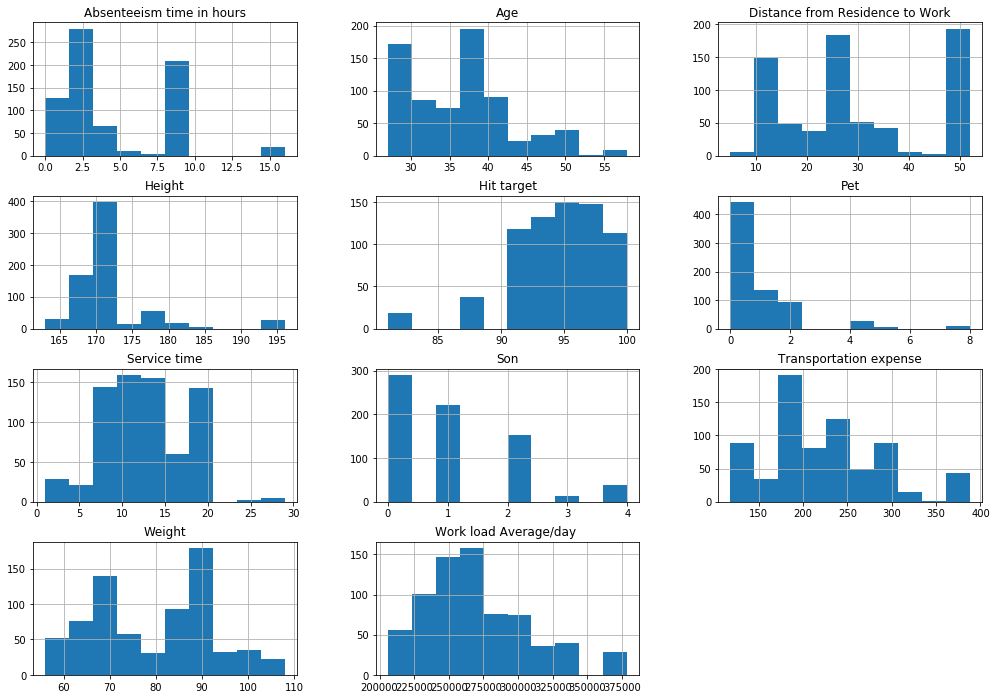

In [40]:
#Histograms after outlier removal
from matplotlib import pyplot
df_num.hist(figsize=(17,12))
pyplot.show()

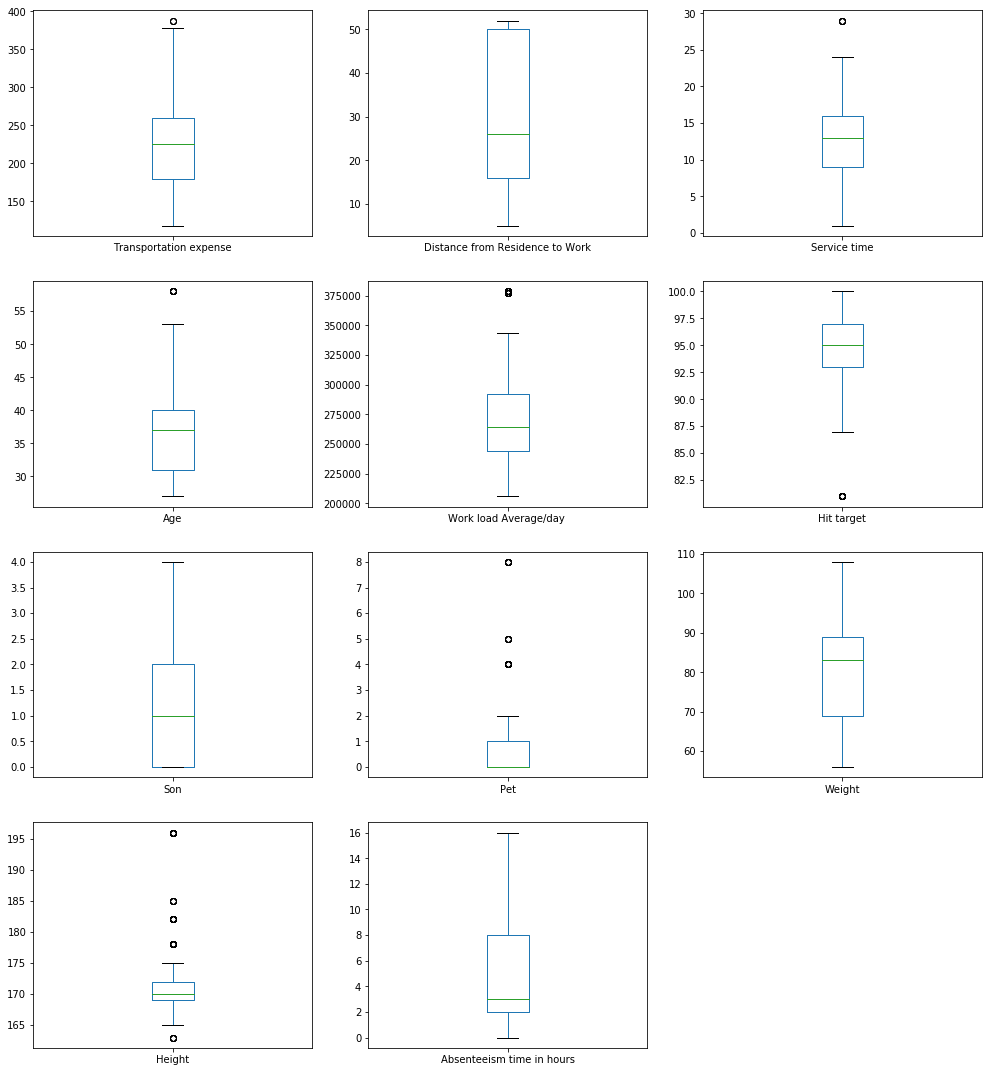

In [41]:
#Boxplots of numeric varaibles after outlier removal
df_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)
pyplot.show()

In [42]:
cnames = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height']

## Feature Scaling

In [43]:
#Feature Scaling of all numeric varaibles except the target varaible
for i in cnames:
   
    df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

In [44]:
from sklearn.cross_validation import train_test_split
from random import *    
from numpy import *

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [46]:
df1=df.copy()

In [47]:
#Creating dummies for all categorical variables

mylist = list(df.select_dtypes(include=['category']).columns)
dummies = pd.get_dummies(df1[mylist], prefix= mylist,drop_first=True)
df1.drop(mylist, axis=1, inplace = True)
df1 = pd.concat([df1,dummies], axis =1)

In [48]:
#Creating train and test data
random.seed(2)
X = df1.drop(columns=['Absenteeism time in hours','ID'])
y = df1['Absenteeism time in hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [49]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

# Model Development

### Performing Linear regression and checking its summary

In [50]:
#Linear Regression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)

In [51]:
model_lr_dummies = sm.OLS(y_train,X_train).fit()

In [52]:
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.784
Method:                        Least Squares   F-statistic:                     35.06
Date:                       Mon, 01 Oct 2018   Prob (F-statistic):          2.46e-146
Time:                               04:45:42   Log-Likelihood:                -1302.1
No. Observations:                        574   AIC:                             2726.
Df Residuals:                            513   BIC:                             2992.
Df Model:                                 61                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation expense              1.3097      0.621      2.108      0.036       0.089       2.531
Distance from Residence to Work     0.0701      0.562      0.125      0.901      -1.034       1.174
Service time                        0.1185      1.296      0.091      0.927      -2.427       2.664
Age                                -1.3471      0.797     -1.690      0.092      -2.913       0.219
Work load Average/day               1.6122      0.573      2.815      0.005       0.487       2.737
Hit target                          1.8350      0.839      2.188      0.029       0.188       3.482
Son                                 0.8702      0.491      1.773      0.077      -0.094       1.834
Pet                                -1.3783      0.899     -1.533      0.126      -3.145       0.388
Weight                              1.1267      0.665      1.693      0.091      -0.181       2.434
Height                             -1.8893      0.859     -2.199      0.028      -3.577      -0.202
Reason for absence_2.0             -0.7065      2.666     -0.265      0.791      -5.945       4.532
Reason for absence_3.0              2.1236      2.626      0.809      0.419      -3.035       7.283
Reason for absence_4.0             -0.9750      1.965     -0.496      0.620      -4.835       2.885
Reason for absence_5.0              1.0784      1.922      0.561      0.575      -2.698       4.855
Reason for absence_6.0              1.5388      1.171      1.314      0.189      -0.762       3.839
Reason for absence_7.0             -1.2820      1.004     -1.277      0.202      -3.254       0.690
Reason for absence_8.0              0.2079      1.322      0.157      0.875      -2.389       2.805
Reason for absence_9.0              5.1840      1.416      3.661      0.000       2.402       7.966
Reason for absence_10.0             1.5037      0.916      1.642      0.101      -0.295       3.302
Reason for absence_11.0            -0.5845      0.911     -0.641      0.522      -2.375       1.206
Reason for absence_12.0            -0.0273      1.231     -0.022      0.982      -2.446       2.391
Reason for absence_13.0             0.0540      0.804      0.067      0.947      -1.526       1.634
Reason for absence_14.0            -1.6742      0.958     -1.748      0.081      -3.556       0.207
Reason for absence_15.0             1.4717      1.909      0.771      0.441      -2.279       5.223
Reason for absence_16.0            -2.8259      1.478     -1.912      0.056      -5.730       0.078
Reason for absence_17.0             0.8029      2.678      0.300      0.764      -4.459       6.065
Reason for absence_18.0             0.3663      0.950      0.385      0.700      -1.501       2.234
Reason

In [53]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("train_rmse_lr:")
train_rmse_lr

train_rmse_lr:


2.3221722321368317

In [54]:
test_rmse_lr=sqrt(mean_squared_error(y_test,y_pred))
print("test_rmse_lr:")
test_rmse_lr

test_rmse_lr:


3.5492565731744756

## Performing all the regressions in one go with their default parameters

In [55]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, Lars
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

regressors = [DecisionTreeRegressor(),  AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), RandomForestRegressor(),
Ridge(), Lasso(), LinearRegression(), ElasticNet(), Lars(), SVR(), KNeighborsRegressor(),XGBRegressor()]


imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)
    


DecisionTreeRegressor
Result-test
RMSE: 4.346134936801766
Result-train
RMSE: 0.26807482443947966
AdaBoostRegressor
Result-test
RMSE: 3.7049464047044403
Result-train
RMSE: 2.7963536152480746
GradientBoostingRegressor
Result-test
RMSE: 3.4747885667678045
Result-train
RMSE: 1.9479853430273673
ExtraTreesRegressor
Result-test
RMSE: 3.5748602450452434
Result-train
RMSE: 0.26807482443947966
RandomForestRegressor
Result-test
RMSE: 3.454816155486407
Result-train
RMSE: 1.1326756427399138
Ridge
Result-test
RMSE: 3.4796849319660326
Result-train
RMSE: 2.334055816414068
Lasso
Result-test
RMSE: 4.058357539349357
Result-train
RMSE: 3.232807836883631
LinearRegression
Result-test
RMSE: 3.480437989373406
Result-train
RMSE: 2.3221722321368317
ElasticNet
Result-test
RMSE: 4.058357539349357
Result-train
RMSE: 3.232807836883631
Lars
Result-test
RMSE: 3.595084881305428
Result-train
RMSE: 2.4403562716065466
SVR
Result-test
RMSE: 4.040058113370883
Result-train
RMSE: 2.993197635737354
KNeighborsRegressor
Result-

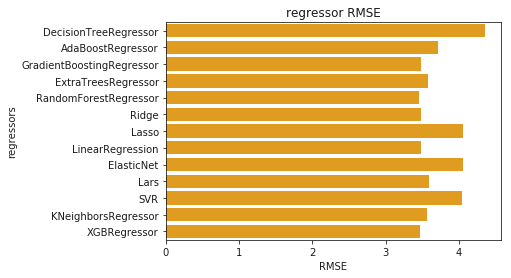

In [56]:
#A plot indicating all regressions' RMSE values for easy comparison
sn.set_color_codes("muted")
sn.barplot(x='MSE', y='regressors', data=imp, color="orange")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

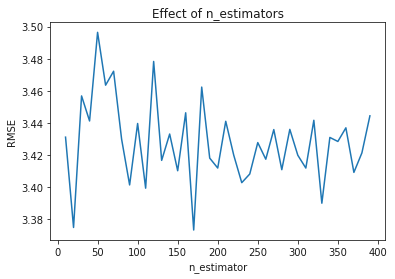

In [57]:
#Checking the number of trees v/s RMSE values 

rf_model = RandomForestRegressor().fit(X_train, y_train)
estimators = np.arange(10, 400, 10)
scores = []

for n in estimators:
    rf_model.set_params(n_estimators=n)
    forest=rf_model.fit(X_train,y_train)
    train_predictions_y = forest.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

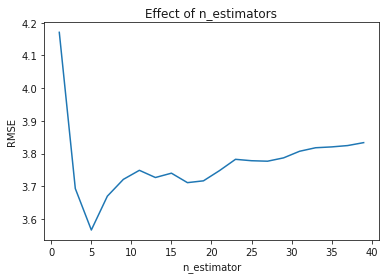

In [58]:
#Checking the number of nearest neighbours v/s RMSE for KNN

KNN_model=KNeighborsRegressor().fit(X_train, y_train)
estimators = np.arange(1, 41, 2)
scores = []

for n in estimators:
    KNN_model.set_params(n_neighbors=n)
    KNN=KNN_model.fit(X_train,y_train)
    train_predictions_y = KNN.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

### Parameter tuning using GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV
regressor = XGBRegressor(random_state=1)
params = [{'n_estimators' : [250, 300,400], 'max_depth':[2, 3], 
           'learning_rate':[0.01,0.05, 0.1, 0.3],'gamma':[0, 0.001, 0.01],
           'subsample':[1, 0.7, 0.8],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 9,
                           scoring = 'explained_variance', n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

IndentationError: unexpected indent (<ipython-input-59-de4daf718f3b>, line 4)

In [60]:
# Building XGBRegressor on tuned parameter
regressor = XGBRegressor(random_state=1, learning_rate=0.01, max_depth=3, n_estimators=400, 
                         gamma = 0, subsample=0.7)
XGB=regressor.fit(X_train, y_train)

In [61]:
train_predictions_XGB = regressor.predict(X_test)
mse_XGB = np.sqrt(mean_squared_error(y_test, train_predictions_XGB))
mse_XGB

3.504748880640709